In [35]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [53]:
#print(data.head())
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 268 entries, patientName to Day 61-90: Any other
dtypes: bool(4), int64(3), object(261)
memory usage: 103.4+ KB
None


In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\LENOVO\Downloads\merged_database.csv"
data = pd.read_csv(file_path)
print(data.head())
columns_to_drop = [
    "patientName", "dateOfAdmission", "dateOfProcedure", "admittingDepartment",
    "departmentPrimarySurgeon", "procedureDoneBy", "procedureName", "diagnosis",
    "otno", "outpatientProcedure", "papDuration", "ssiEventOccurred", "dateOfSSIEvent",
    "microorganism1", "antibiotics", "timeOfInduction", "timeOfSkinIncision",
    "timeOfEndSurgery", "isolate1", "microorganism2", "isolate2", "SSIEvalCheckList",
    "detected", "status", "nuid", "patientId", "secondaryBSIdeath", "antibioticGiven"
]


df_cleaned = data.drop(columns=columns_to_drop, errors='ignore')


  patientName  age gender dateOfAdmission dateOfProcedure  \
0       ROHAN   56      M      12-04-2024      12-04-2024   
1     Nichole   60      M      08-10-2023      12-04-2024   
2       Logan   30      M      26-03-2024      12-04-2024   
3   Alexander   36      M      16-01-2024      12-04-2024   
4       April   65      M      22-06-2024      12-04-2024   

         admittingDepartment departmentPrimarySurgeon     procedureDoneBy  \
0  GIS Hepatobiliary Surgery          Dr. Helen Clark     Dr. Laura Scott   
1            General Surgery          Dr. Emily Black      Dr. Ian Miller   
2                Dermatology          Dr. Brian White  Dr. Kevin Anderson   
3  GIS Hepatobiliary Surgery          Dr. Helen Clark       Dr. Rose King   
4                 Cardiology          Dr. Alice Green    Dr. Patricia Lee   

           procedureName                     diagnosis  ...  Day 61-90: fever  \
0           Hysterectomy                        Hernia  ...                No   
1       

In [122]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 240 entries, age to Day 61-90: Any other
dtypes: bool(1), int64(1), object(238)
memory usage: 93.5+ KB


In [123]:
df_cleaned.describe()

,age
count,50.000000
mean,46.320000
std,16.033689
min,20.000000
25%,33.000000
50%,46.000000
75%,60.000000
max,77.000000


In [124]:
print("Data Types of Each Column:")
print(df_cleaned.dtypes)

Data Types of Each Column:
age                             int64
gender                         object
scenarioOfProcedure            object
woundClass                     object
papGiven                         bool
                                ...  
Day 61-90: imagingEvidence     object
Day 61-90: positiveCulture     object
Day 61-90: bloodCultureSent    object
Day 61-90: diagnosisSSI        object
Day 61-90: Any other           object
Length: 240, dtype: object


In [125]:
# Select columns that match the pattern "Day X:"
columns_to_replace = [col for col in df_cleaned.columns if col.startswith("Day ")]
# Replace True/False with 1/0 in these columns
df_cleaned[columns_to_replace] = df_cleaned[columns_to_replace].replace({'Yes': 1, 'No': 0})
print(df_cleaned.head())


   age gender scenarioOfProcedure          woundClass  papGiven specificEvent  \
0   56      M            elective               clean      True           SIP   
1   60      M            elective  clean contaminated      True           SIP   
2   30      M            elective  clean contaminated     False           SIP   
3   36      M            elective  clean contaminated     False           SIP   
4   65      M            elective               clean      True           SIP   

   Day 1: purulentDischarge  Day 1: localizedPain  Day 1: localizedSwelling  \
0                         1                     1                         1   
1                         1                     1                         1   
2                         1                     1                         1   
3                         1                     1                         1   
4                         1                     1                         1   

   Day 1: fever  ...  Day 61-90: fever

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21516\3410857138.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[columns_to_replace] = df_cleaned[columns_to_replace].replace({'Yes': 1, 'No': 0})


In [126]:
print("Data Types of Each Column:")
print(df_cleaned.dtypes)

Data Types of Each Column:
age                             int64
gender                         object
scenarioOfProcedure            object
woundClass                     object
papGiven                         bool
                                ...  
Day 61-90: imagingEvidence      int64
Day 61-90: positiveCulture      int64
Day 61-90: bloodCultureSent     int64
Day 61-90: diagnosisSSI         int64
Day 61-90: Any other            int64
Length: 240, dtype: object


In [127]:
df_cleaned.head()

,age,gender,scenarioOfProcedure,woundClass,papGiven,specificEvent,Day 1: purulentDischarge,Day 1: localizedPain,Day 1: localizedSwelling,Day 1: fever,...,Day 61-90: fever,Day 61-90: incisionOpened,Day 61-90: dehiscence,Day 61-90: abscess,Day 61-90: microorganismsSeen,Day 61-90: imagingEvidence,Day 61-90: positiveCulture,Day 61-90: bloodCultureSent,Day 61-90: diagnosisSSI,Day 61-90: Any other
0,56,M,elective,clean,True,SIP,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,60,M,elective,clean contaminated,True,SIP,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,30,M,elective,clean contaminated,False,SIP,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,36,M,elective,clean contaminated,False,SIP,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,65,M,elective,clean,True,SIP,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# Assuming df_cleaned is already defined
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# Columns to encode
categorical_columns = ["gender", "scenarioOfProcedure", "woundClass", "papGiven"]
output_column = "specificEvent"

# 1. One-Hot Encoding for Nominal Data
one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first")  # Drop first to avoid multicollinearity
one_hot_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(df_cleaned[["gender", "scenarioOfProcedure"]]),
    columns=one_hot_encoder.get_feature_names_out(["gender", "scenarioOfProcedure"])
)

# 2. Ordinal Encoding for Ordinal Data
ordinal_encoder = OrdinalEncoder(categories=[["clean", "clean contaminated", "contaminated", "Dirty/infected"]])
df_cleaned["woundClass_encoded"] = ordinal_encoder.fit_transform(df_cleaned[["woundClass"]])

# 3. Encoding for Boolean Data
df_cleaned["papGiven_encoded"] = df_cleaned["papGiven"].astype(int)  # Convert True/False to 1/0

# 4. Label Encoding for Output Column
label_encoder = LabelEncoder()
df_cleaned["specificEvent_encoded"] = label_encoder.fit_transform(df_cleaned[output_column])

# Combine Encoded Columns
df_cleaned = pd.concat([df_cleaned.drop(columns=categorical_columns + [output_column]), one_hot_encoded], axis=1)

# Display the updated DataFrame
print(df_cleaned.head())

# Save Encoders for Mapping Back Predictions
print("Label Encoding for Output Column:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


   age  Day 1: purulentDischarge  Day 1: localizedPain  \
0   56                         1                     1   
1   60                         1                     1   
2   30                         1                     1   
3   36                         1                     1   
4   65                         1                     1   

   Day 1: localizedSwelling  Day 1: fever  Day 1: incisionOpened  \
0                         1             1                      0   
1                         1             1                      0   
2                         1             1                      0   
3                         1             1                      0   
4                         1             1                      0   

   Day 1: dehiscence  Day 1: abscess  Day 1: microorganismsSeen  \
0                  0               0                          0   
1                  0               0                          0   
2                  0               0     

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21516\472602395.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cleaned["woundClass_encoded"] = ordinal_encoder.fit_transform(df_cleaned[["woundClass"]])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21516\472602395.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cleaned["papGiven_encoded"] = df_cleaned["papGiven"].astype(int)  # Convert True/False to 1/0
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21516\472602395.py:24: PerformanceWarning: DataFrame is highly fragment

In [129]:
df_cleaned.head()

,age,Day 1: purulentDischarge,Day 1: localizedPain,Day 1: localizedSwelling,Day 1: fever,Day 1: incisionOpened,Day 1: dehiscence,Day 1: abscess,Day 1: microorganismsSeen,Day 1: imagingEvidence,...,Day 61-90: imagingEvidence,Day 61-90: positiveCulture,Day 61-90: bloodCultureSent,Day 61-90: diagnosisSSI,Day 61-90: Any other,woundClass_encoded,papGiven_encoded,specificEvent_encoded,gender_M,scenarioOfProcedure_emergency
0,56,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0.0,1,2,1.0,0.0
1,60,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1.0,1,2,1.0,0.0
2,30,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1.0,0,2,1.0,0.0
3,36,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1.0,0,2,1.0,0.0
4,65,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0.0,1,2,1.0,0.0


Class Probabilities and Predictions:
   Probability of 0  Probability of 1  Probability of 2  Probability of 3  \
0              0.25              0.75              0.00              0.00   
1              0.71              0.29              0.00              0.00   
2              0.01              0.05              0.00              0.00   
3              0.01              0.36              0.00              0.00   
4              0.00              0.00              0.73              0.27   

   Probability of 4  Predicted Class  age  Day 1: purulentDischarge  \
0              0.00                1   45                         1   
1              0.00                0   20                         1   
2              0.94                4   23                         1   
3              0.63                4   53                         1   
4              0.00                2   54                         1   

   Day 1: localizedPain  Day 1: localizedSwelling  ...  \
0              

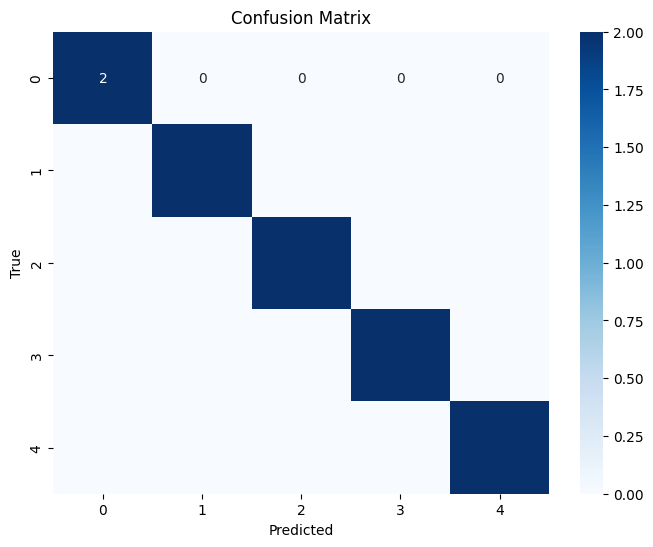

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df_cleaned is already preprocessed and available

# Encode the labels if they are strings
label_encoder = LabelEncoder()
df_cleaned['specificEvent_encoded'] = label_encoder.fit_transform(df_cleaned['specificEvent_encoded'])

# Split into input (X) and output (y)
X = df_cleaned.drop(columns=["specificEvent_encoded"])  # Features
y = df_cleaned["specificEvent_encoded"]  # Target

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict class probabilities on the test set
y_pred_proba = model.predict_proba(X_test)

# Predicted classes (as numeric labels)
y_pred = model.predict(X_test)

# Map the numeric predicted values back to the original class labels
predicted_classes = label_encoder.inverse_transform(y_pred)

# Display the predicted probabilities for each class
class_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
test_results = pd.DataFrame(y_pred_proba, columns=[f"Probability of {class_mapping[i]}" for i in range(len(class_mapping))])
test_results["Predicted Class"] = predicted_classes

# Combine with test set indices for clarity
final_results = pd.concat([test_results, X_test.reset_index(drop=True)], axis=1)

# Display the results
print("Class Probabilities and Predictions:")
print(final_results.head())

# Example to print probabilities of the first test sample
print("\nProbabilities for the first test sample:")
print(test_results.iloc[0])

# Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming df_cleaned is already preprocessed and available

# Split into input (X) and output (y)
X = df_cleaned.drop(columns=["specificEvent_encoded"])  # Features
y = df_cleaned["specificEvent_encoded"]  # Target

# One-Hot Encode the Target Variable
y_onehot = to_categorical(y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y)

# Scale the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define ANN Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Define ANN Model with Dropout and L2 Regularization
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'), 
    Dropout(0.3),  
    Dense(32, activation='relu'),  
    Dropout(0.3),  
    Dense(y_onehot.shape[1], activation='softmax') 
])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# Predict Probabilities on Test Data
y_pred_proba = model.predict(X_test)

# Get predicted class labels from probabilities
y_pred_classes = y_pred_proba.argmax(axis=1)

y_test_actual = y_test.argmax(axis=1)  


class_mapping = dict(zip(range(len(df_cleaned["specificEvent_encoded"].unique())), df_cleaned["specificEvent_encoded"].unique()))


f1 = f1_score(y_test_actual, y_pred_classes, average='weighted')
precision = precision_score(y_test_actual, y_pred_classes, average='weighted')
recall = recall_score(y_test_actual, y_pred_classes, average='weighted')

print("\nEvaluation Metrics:")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_actual, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test_actual, y_pred_classes, target_names=[str(i) for i in class_mapping.values()])
print("\nClassification Report:")
print(class_report)

# Combine Test Features with Predictions
test_results = pd.DataFrame(y_pred_proba, columns=[f"Probability of Class {class_mapping[i]}" for i in range(len(class_mapping))])
test_results["Predicted Class"] = [class_mapping[pred] for pred in y_pred_classes]

final_results = pd.concat([test_results, pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)], axis=1)

# Display Results
print("Class Probabilities and Predictions:")
print(final_results.head())

# Example: Probabilities of the first test sample
print("\nProbabilities for the first test sample:")
print(test_results.iloc[0])
print(y_onehot.shape[1])

Epoch 1/30


C:\Users\LENOVO\Downloads\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 437ms/step - accuracy: 0.0475 - loss: 1.7775 - val_accuracy: 0.2500 - val_loss: 1.6286
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2211 - loss: 1.5776 - val_accuracy: 0.5000 - val_loss: 1.5038
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5764 - loss: 1.4334 - val_accuracy: 0.5000 - val_loss: 1.4058
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6447 - loss: 1.3078 - val_accuracy: 0.5000 - val_loss: 1.3246
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6921 - loss: 1.2195 - val_accuracy: 0.5000 - val_loss: 1.2559
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7025 - loss: 1.1202 - val_accuracy: 0.5000 - val_loss: 1.1972
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7685 - loss: 1.0621 - val_accuracy: 0.7500 - val_loss: 1.1421
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7789 - loss: 0.9961 - val_accuracy: 0.7500 - val_loss: 1.0947
Epoch 9/30

C:\Users\LENOVO\Downloads\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\Downloads\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\Downloads\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\L

In [134]:
import joblib
from tensorflow.keras.models import save_model

# Save the scaler (used for feature scaling)
scaler_path = "scaler.pkl"
joblib.dump(scaler, scaler_path)

# Save the trained ANN model
model_path = "ann_model.h5"
model.save(model_path)

print(f"Scaler saved at: {scaler_path}")
print(f"Model saved at: {model_path}")


Scaler saved at: scaler.pkl
Model saved at: ann_model.h5


In [132]:
print("vgy")

vgy


In [135]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# Load the saved scaler and model
scaler = joblib.load("scaler.pkl")
model = load_model("ann_model.h5")

# Define class mapping
class_mapping = {0: "DIP", 1: "DIS", 2: "SIP", 3: "SIS", 4: "organ/space"}

# Columns to drop
columns_to_drop = [
    "patientName", "dateOfAdmission", "dateOfProcedure", "admittingDepartment",
    "departmentPrimarySurgeon", "procedureDoneBy", "procedureName", "diagnosis",
    "otno", "outpatientProcedure", "papDuration", "ssiEventOccurred", "dateOfSSIEvent",
    "microorganism1", "antibiotics", "timeOfInduction", "timeOfSkinIncision",
    "timeOfEndSurgery", "isolate1", "microorganism2", "isolate2", "SSIEvalCheckList",
    "detected", "status", "nuid", "patientId", "secondaryBSIdeath", "antibioticGiven",
    "specificEvent"  # Target column to predict
]

categorical_columns = ["gender", "scenarioOfProcedure", "woundClass", "papGiven"]
# Define the instance
instance_data = {
    "patientName": "Nichole", "age": 60, "gender": "M", "dateOfAdmission": "08-10-2023",
    "dateOfProcedure": "12-04-2024", "admittingDepartment": "General Surgery",
    "departmentPrimarySurgeon": "Dr. Emily Black", "procedureDoneBy": "Dr. Ian Miller",
    "procedureName": "Hernioplasty", "diagnosis": "Acute Intestinal Obstruction",
    "otno": 2, "outpatientProcedure": "FALSE", "scenarioOfProcedure": "elective",
    "woundClass": "clean contaminated", "papGiven":1, "papDuration": "22 minutes",
    "ssiEventOccurred": "TRUE", "dateOfSSIEvent": "02-01-2024", "microorganism1": "Other",
    "antibiotics": "[{\"doses\": 0, \"route\": \"\", \"duration\": 0, \"abop_stage\": \"prior\", \"antibiotic\": \"\"}]",
    "timeOfInduction": "08:17:00", "timeOfSkinIncision": "08:28:00", "timeOfEndSurgery": "09:06:00",
    "isolate1": "{\"resistant\": \"\", \"sensitive\": \"\", \"intermediate\": \"\"}",
    "microorganism2": "Other",
    "isolate2": "{\"resistant\": \"\", \"sensitive\": \"\", \"intermediate\": \"\"}",
    "SSIEvalCheckList": "[{\"item\": \"Administer antimicrobial prophylaxis in accordance with evidence-based standards.\", \"yesNo\": true, \"remark\": \"full recommendation followed\"}]",
    "detected": "A", "status": "ongoing", "nuid": "5860f149-3bbd-4416-a59d-4b3906712ff3",
    "patientId": 2, "secondaryBSIdeath": "FALSE", "antibioticGiven": "Inj Magnen Jorte 1.5gm (IV)",
    "Day 1: purulentDischarge": "Yes",
    "Day 1: localizedPain": "Yes",
    "Day 1: localizedSwelling": "Yes",
    "Day 1: fever": "Yes",
    "Day 1: incisionOpened": "No",
    "Day 1: dehiscence": "No",
    "Day 1: abscess": "No",
    "Day 1: microorganismsSeen": "No",
    "Day 1: imagingEvidence" :"No",
    "Day 1: positiveCulture" :"No",
    "Day 1: bloodCultureSent": "No",
    "Day 1: diagnosisSSI": "No",
    "Day 1: Any other": "No",
    "Day 2: purulentDischarge": "Yes",
    "Day 2: localizedPain": "Yes",
    "Day 2: localizedSwelling": "Yes",
    "Day 2: fever": "Yes",
    "Day 2: incisionOpened": "No",
    "Day 2: dehiscence": "No",
    "Day 2: abscess": "No",
    "Day 2: microorganismsSeen": "No",
    "Day 2: imagingEvidence" :"No",
    "Day 2: positiveCulture" :"No",
    "Day 2: bloodCultureSent": "No",
    "Day 2: diagnosisSSI": "No",
    "Day 2: Any other": "No",
    "Day 3: purulentDischarge": "Yes",
    "Day 3: localizedPain": "Yes",
    "Day 3: localizedSwelling": "Yes",
    "Day 3: fever": "Yes",
    "Day 3: incisionOpened": "No",
    "Day 3: dehiscence": "No",
    "Day 3: abscess": "No",
    "Day 3: microorganismsSeen": "No",
    "Day 3: imagingEvidence" :"No",
    "Day 3: positiveCulture" :"No",
    "Day 3: bloodCultureSent": "No",
    "Day 3: diagnosisSSI": "No",
    "Day 3: Any other": "No",
    "Day 4: purulentDischarge": "Yes",
    "Day 4: localizedPain": "Yes",
    "Day 4: localizedSwelling": "Yes",
    "Day 4: fever": "Yes",
    "Day 4: incisionOpened": "No",
    "Day 4: dehiscence": "No",
    "Day 4: abscess": "No",
    "Day 4: microorganismsSeen": "No",
    "Day 4: imagingEvidence" :"No",
    "Day 4: positiveCulture" :"No",
    "Day 4: bloodCultureSent": "No",
    "Day 4: diagnosisSSI": "No",
    "Day 4: Any other": "No",
    "Day 5: purulentDischarge": "Yes",
    "Day 5: localizedPain": "Yes",
    "Day 5: localizedSwelling": "Yes",
    "Day 5: fever": "Yes",
    "Day 5: incisionOpened": "No",
    "Day 5: dehiscence": "No",
    "Day 5: abscess": "No",
    "Day 5: microorganismsSeen": "No",
    "Day 5: imagingEvidence" :"No",
    "Day 5: positiveCulture" :"No",
    "Day 5: bloodCultureSent": "No",
    "Day 5: diagnosisSSI": "No",
    "Day 5: Any other": "No",
    "Day 6: purulentDischarge": "Yes",
    "Day 6: localizedPain": "Yes",
    "Day 6: localizedSwelling": "Yes",
    "Day 6: fever": "Yes",
    "Day 6: incisionOpened": "No",
    "Day 6: dehiscence": "No",
    "Day 6: abscess": "No",
    "Day 6: microorganismsSeen": "No",
    "Day 6: imagingEvidence" :"No",
    "Day 6: positiveCulture" :"No",
    "Day 6: bloodCultureSent": "No",
    "Day 6: diagnosisSSI": "No",
    "Day 6: Any other": "No",
    "Day 7: purulentDischarge": "Yes",
    "Day 7: localizedPain": "Yes",
    "Day 7: localizedSwelling": "Yes",
    "Day 7: fever": "Yes",
    "Day 7: incisionOpened": "No",
    "Day 7: dehiscence": "No",
    "Day 7: abscess": "No",
    "Day 7: microorganismsSeen": "No",
    "Day 7: imagingEvidence" :"No",
    "Day 7: positiveCulture" :"No",
    "Day 7: bloodCultureSent": "No",
    "Day 7: diagnosisSSI": "No",
    "Day 7: Any other": "No",
    "Day 8: purulentDischarge": "Yes",
    "Day 8: localizedPain": "Yes",
    "Day 8: localizedSwelling": "Yes",
    "Day 8: fever": "Yes",
    "Day 8: incisionOpened": "No",
    "Day 8: dehiscence": "No",
    "Day 8: abscess": "No",
    "Day 8: microorganismsSeen": "No",
    "Day 8: imagingEvidence" :"No",
    "Day 8: positiveCulture" :"No",
    "Day 8: bloodCultureSent": "No",
    "Day 8: diagnosisSSI": "No",
    "Day 8: Any other": "No",
    "Day 9: purulentDischarge": "Yes",
    "Day 9: localizedPain": "Yes",
    "Day 9: localizedSwelling": "Yes",
    "Day 9: fever": "Yes",
    "Day 9: incisionOpened": "No",
    "Day 9: dehiscence": "No",
    "Day 9: abscess": "No",
    "Day 9: microorganismsSeen": "No",
    "Day 9: imagingEvidence" :"No",
    "Day 9: positiveCulture" :"No",
    "Day 9: bloodCultureSent": "No",
    "Day 9: diagnosisSSI": "No",
    "Day 9: Any other": "No",
    "Day 10: purulentDischarge": "Yes",
    "Day 10: localizedPain": "Yes",
    "Day 10: localizedSwelling": "Yes",
    "Day 10: fever": "Yes",
    "Day 10: incisionOpened": "No",
    "Day 10: dehiscence": "No",
    "Day 10: abscess": "No",
    "Day 10: microorganismsSeen": "No",
    "Day 10: imagingEvidence" :"No",
    "Day 10: positiveCulture" :"No",
    "Day 10: bloodCultureSent": "No",
    "Day 10: diagnosisSSI": "No",
    "Day 10: Any other": "No",
    "Day 11: purulentDischarge": "Yes",
    "Day 11: localizedPain": "Yes",
    "Day 11: localizedSwelling": "Yes",
    "Day 11: fever": "Yes",
    "Day 11: incisionOpened": "No",
    "Day 11: dehiscence": "No",
    "Day 11: abscess": "No",
    "Day 11: microorganismsSeen": "No",
    "Day 11: imagingEvidence" :"No",
    "Day 11: positiveCulture" :"No",
    "Day 11: bloodCultureSent": "No",
    "Day 11: diagnosisSSI": "No",
    "Day 11: Any other": "No", 
    "Day 12: purulentDischarge": "Yes",
    "Day 12: localizedPain": "Yes",
    "Day 12: localizedSwelling": "Yes",
    "Day 12: fever": "Yes",
    "Day 12: incisionOpened": "No",
    "Day 12: dehiscence": "No",
    "Day 12: abscess": "No",
    "Day 12: microorganismsSeen": "No",
    "Day 12: imagingEvidence" :"No",
    "Day 12: positiveCulture" :"No",
    "Day 12: bloodCultureSent": "No",
    "Day 12: diagnosisSSI": "No",
    "Day 12: Any other": "No",
    "Day 13: purulentDischarge": "Yes",
    "Day 13: localizedPain": "Yes",
    "Day 13: localizedSwelling": "Yes",
    "Day 13: fever": "Yes",
    "Day 13: incisionOpened": "No",
    "Day 13: dehiscence": "No",
    "Day 13: abscess": "No",
    "Day 13: microorganismsSeen": "No",
    "Day 13: imagingEvidence" :"No",
    "Day 13: positiveCulture" :"No",
    "Day 13: bloodCultureSent": "No",
    "Day 13: diagnosisSSI": "No",
    "Day 13: Any other": "No",
    "Day 14: purulentDischarge": "Yes",
    "Day 14: localizedPain": "Yes",
    "Day 14: localizedSwelling": "Yes",
    "Day 14: fever": "Yes",
    "Day 14: incisionOpened": "No",
    "Day 14: dehiscence": "No",
    "Day 14: abscess": "No",
    "Day 14: microorganismsSeen": "No",
    "Day 14: imagingEvidence" :"No",
    "Day 14: positiveCulture" :"No",
    "Day 14: bloodCultureSent": "No",
    "Day 14: diagnosisSSI": "No",
    "Day 14: Any other": "No",
    "Day 15: purulentDischarge": "Yes",
    "Day 15: localizedPain": "Yes",
    "Day 15: localizedSwelling": "Yes",
    "Day 15: fever": "Yes",
    "Day 15: incisionOpened": "No",
    "Day 15: dehiscence": "No",
    "Day 15: abscess": "No",
    "Day 15: microorganismsSeen": "No",
    "Day 15: imagingEvidence" :"No",
    "Day 15: positiveCulture" :"No",
    "Day 15: bloodCultureSent": "No",
    "Day 15: diagnosisSSI": "No",
    "Day 15: Any other": "No", 
    "Day 16-30: purulentDischarge": "Yes",
    "Day 16-30: localizedPain": "Yes",
    "Day 16-30: localizedSwelling": "Yes",
    "Day 16-30: fever": "Yes",
    "Day 16-30: incisionOpened": "No",
    "Day 16-30: dehiscence": "No",
    "Day 16-30: abscess": "No",
    "Day 16-30: microorganismsSeen": "No",
    "Day 16-30: imagingEvidence" :"No",
    "Day 16-30: positiveCulture" :"No",
    "Day 16-30: bloodCultureSent": "No",
    "Day 16-30: diagnosisSSI": "No",
    "Day 16-30: Any other": "No",
    "Day 31-60: purulentDischarge": "Yes",
    "Day 31-60: localizedPain": "Yes",
    "Day 31-60: localizedSwelling": "Yes",
    "Day 31-60: fever": "Yes",
    "Day 31-60: incisionOpened": "No",
    "Day 31-60: dehiscence": "No",
    "Day 31-60: abscess": "No",
    "Day 31-60: microorganismsSeen": "No",
    "Day 31-60: imagingEvidence" :"No",
    "Day 31-60: positiveCulture" :"No",
    "Day 31-60: bloodCultureSent": "No",
    "Day 31-60: diagnosisSSI": "No",
    "Day 31-60: Any other": "No",
    "Day 61-90: purulentDischarge": "Yes",
    "Day 61-90: localizedPain": "Yes",
    "Day 61-90: localizedSwelling": "Yes",
    "Day 61-90: fever": "Yes",
    "Day 61-90: incisionOpened": "No",
    "Day 61-90: dehiscence": "No",
    "Day 61-90: abscess": "No",
    "Day 61-90: microorganismsSeen": "No",
    "Day 61-90: imagingEvidence" :"No",
    "Day 61-90: positiveCulture" :"No",
    "Day 61-90: bloodCultureSent": "No",
    "Day 61-90: diagnosisSSI": "No",
    "Day 61-90: Any other": "No",
    # Add all other "Day" related features here
}

# Convert the instance to a DataFrame
instance_df = pd.DataFrame([instance_data])

# Drop unnecessary columns
instance_df = instance_df.drop(columns=columns_to_drop, errors="ignore")

# Replace "Yes"/"No" with 1/0 for Day-related columns
day_columns = [col for col in instance_df.columns if col.startswith("Day ")]
instance_df[day_columns] = instance_df[day_columns].replace({"Yes": 1, "No": 0})
# 2. Ordinal Encoding for Ordinal Data
ordinal_encoder = OrdinalEncoder(categories=[["clean", "clean contaminated", "contaminated", "Dirty/infected"]])
instance_df["woundClass_encoded"] = ordinal_encoder.fit_transform(instance_df[["woundClass"]])

# 3. Encoding for Boolean Data
instance_df["papGiven_encoded"] = instance_df["papGiven"].astype(int)  # Convert True/False to 1/0

instance_df["gender_M"] = instance_df["gender"].apply(lambda x: 1 if x == "M" else 0)
instance_df["scenarioOfProcedure_emergency"] = instance_df["scenarioOfProcedure"].apply(lambda x: 1 if x == "emergency" else 0)

instance_df = instance_df.drop(columns=categorical_columns)
print(instance_df)
# Scale the features
scaled_features = scaler.transform(instance_df)

# Make a prediction
probabilities = model.predict(instance_df)
predicted_class = probabilities.argmax(axis=1)[0]
predicted_class_name = class_mapping[predicted_class]

# Output the result
print("Probabilities:", probabilities.tolist()[0])
print("Predicted Class:", predicted_class_name)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21516\285033241.py:288: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  instance_df[day_columns] = instance_df[day_columns].replace({"Yes": 1, "No": 0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21516\285033241.py:291: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  instance_df["woundClass_encoded"] = ordinal_encoder.fit_transform(instance_df[["woundClass"]])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21516\285033241.py:294: PerformanceWarning: DataFrame is highly fragmented.  This is

   age  Day 1: purulentDischarge  Day 1: localizedPain  \
0   60                         1                     1   

   Day 1: localizedSwelling  Day 1: fever  Day 1: incisionOpened  \
0                         1             1                      0   

   Day 1: dehiscence  Day 1: abscess  Day 1: microorganismsSeen  \
0                  0               0                          0   

   Day 1: imagingEvidence  ...  Day 61-90: microorganismsSeen  \
0                       0  ...                              0   

   Day 61-90: imagingEvidence  Day 61-90: positiveCulture  \
0                           0                           0   

   Day 61-90: bloodCultureSent  Day 61-90: diagnosisSSI  Day 61-90: Any other  \
0                            0                        0                     0   

   woundClass_encoded  papGiven_encoded  gender_M  \
0                 1.0                 1         1   

   scenarioOfProcedure_emergency  
0                              0  

[1 rows x 239 co